In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


Loading all Images

In [35]:
diabetic_eyes='Messidor-2+EyePac_Balanced'

datagen=ImageDataGenerator(
    rescale=1/255.0
)

image_collection=datagen.flow_from_directory(
    diabetic_eyes,
    target_size=(224,224),
    batch_size=32,
    shuffle=True
)

Found 1800 images belonging to 5 classes.


VGG 16 For Feature Extraction

In [36]:
vgg16_model=Sequential()

vgg16_model.add(Conv2D(64,(3,3),padding="same",activation='relu',input_shape=(224,224,3)))
vgg16_model.add(Conv2D(64,(3,3),padding="same",activation='relu',))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(2):
    vgg16_model.add(Conv2D(128,(3,3),padding="same",activation='relu',))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(3):
    vgg16_model.add(Conv2D(256,(3,3),padding="same",activation='relu',))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(3):
    vgg16_model.add(Conv2D(512,(3,3),padding="same",activation='relu',))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(3):
    vgg16_model.add(Conv2D(512,(3,3),padding="same",activation='relu',))
vgg16_model.add(MaxPooling2D(2,2))

vgg16_model.add(Flatten())



Extract features from the last convolutional layer
Creating a Feature Extractor

In [37]:
feature_extractor=Sequential(vgg16_model.layers[::])
feature_extractor.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

Extracting Features

In [38]:
features=feature_extractor.predict(image_collection)

57/57 [==============================] - 209s 4s/step


SPLIT DATA INTO TRAIN AND TEST

In [39]:
from sklearn.model_selection import train_test_split
labels=image_collection.classes
x_train, x_test, y_train, y_test =train_test_split(features,labels,test_size=0.2,random_state=42)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(labels.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 25088)
(1440,)
(1800,)
(360, 25088)
(360,)


TRAIN WITH SVM CLASSIFIER

In [41]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report


In [42]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear')

MAKE PREDICTIONS AND EVALUATE

In [43]:
y_pred = svm_classifier.predict(x_test)

confusion_matrix_result=confusion_matrix(y_true=y_test,y_pred=y_pred)
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
clasification_rep=classification_report(y_true=y_test,y_pred=y_pred)

print("Confusion Matrix\n")
print(confusion_matrix_result)
print("\n\nAccuracy : {}".format(accuracy))
print("\nClassification Report\n")
print(clasification_rep)


Confusion Matrix

[[ 0  0 69  0  0]
 [ 0  0 81  0  0]
 [ 0  0 64  0  0]
 [ 0  0 69  0  0]
 [ 0  0 77  0  0]]


Accuracy : 0.17777777777777778

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        81
           2       0.18      1.00      0.30        64
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00        77

    accuracy                           0.18       360
   macro avg       0.04      0.20      0.06       360
weighted avg       0.03      0.18      0.05       360



/Users/uvaishnav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uvaishnav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/uvaishnav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PLOT CONFUSION MATRIX

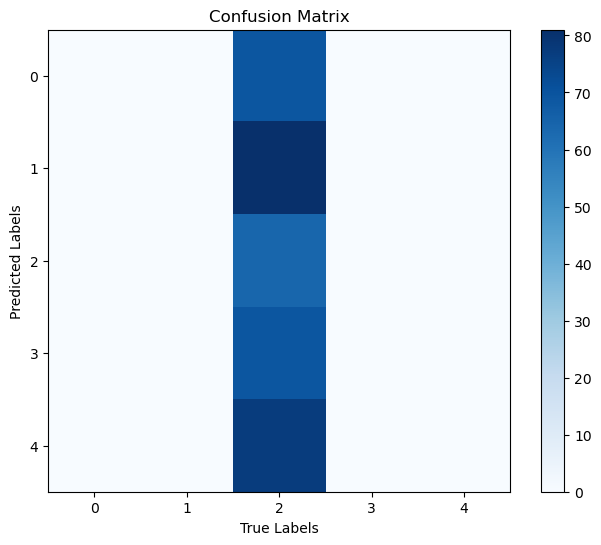

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

class_labels = list(image_collection.class_indices.keys())

plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()
